# Start Python and Check Versions

In [2]:
# Check the versions of libraries

# Python version
import sys
print('Python: {}'.format(sys.version))
# scipy
import scipy
print('scipy: {}'.format(scipy.__version__))
# numpy
import numpy 
print('numpy: {}'.format(numpy.__version__))
# matplotlib
import matplotlib
print('matplotlib: {}'.format(matplotlib.__version__))
# pandas
import pandas
print('pandas: {}'.format(pandas.__version__))
# scikit-learn
import sklearn
print('sklearn: {}'.format(sklearn.__version__))

Python: 3.7.4 (default, Aug  9 2019, 18:34:13) [MSC v.1915 64 bit (AMD64)]
scipy: 1.3.1
numpy: 1.16.5
matplotlib: 3.1.1
pandas: 0.25.1
sklearn: 0.21.3


# Load The Data

## Import libraries

In [3]:
# Load libraries
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
import os

In [4]:
file = os.path.join('..', 'Resources','Crimes_selected.csv')
df = pd.read_csv(file)

#   XY array

In [5]:
X=df.iloc[:,[1,2,3,4,6,16,17]].values
Y=df.iloc[:,[10,11,12,13,14,15]].values

In [6]:
X

array([[  2.        ,  28.        ,  21.        , ...,   9.        ,
         41.79314161, -87.68402191],
       [  2.        ,  28.        ,  21.        , ...,   9.        ,
         41.86995899, -87.73081323],
       [  2.        ,  28.        ,  10.        , ...,   9.        ,
         41.72789844, -87.64947028],
       ...,
       [  7.        ,   3.        ,  12.        , ...,  27.        ,
         41.78145774, -87.63016591],
       [  7.        ,   3.        ,  10.        , ...,  27.        ,
         41.8609002 , -87.70721301],
       [  7.        ,   3.        ,  23.        , ...,  27.        ,
         41.76448135, -87.64006851]])

In [7]:
Y

array([[1, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0],
       ...,
       [0, 0, 1, 0, 0, 0],
       [0, 0, 1, 0, 0, 0],
       [0, 0, 1, 0, 0, 0]], dtype=int64)

## Splitting the data

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=50)

# Creating & Training KNN Model

In [10]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

In [11]:
knn.score(X_test,y_test)

0.6014492753623188

In [12]:
knn.score(X_train,y_train)

0.6831922611850061

## Elbow Method For optimum value of K

In [13]:
error_rate = []
for i in range(1,140):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(numpy.mean(pred_i != y_test))

## Creating & Training Decision Tree Model

In [14]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(max_depth=500, random_state=300)

In [15]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=500,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=300, splitter='best')

In [16]:
y_pred=dtree.predict(X_test)
dtree.score(X_test,y_test)

0.6594202898550725

In [17]:
dtree.score(X_train,y_train)

1.0

In [18]:
y_pred

array([[0, 0, 0, 1, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0],
       ...,
       [0, 0, 0, 1, 0, 0],
       [0, 0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0, 0]], dtype=int64)

In [19]:
treefeatures=dtree.feature_importances_
indices = numpy.argsort(treefeatures)

In [20]:
treefeatures

array([0.02647139, 0.02650714, 0.39382388, 0.07733136, 0.04097452,
       0.21498393, 0.21990778])

In [21]:
features = df.iloc[:,[1,2,3,4,6,16,17]]
features.head()

month   day  hour  dayofyear  weekofyear   Latitude  Longitude
0    2.0  28.0  21.0       59.0         9.0  41.793142 -87.684022
1    2.0  28.0  21.0       59.0         9.0  41.869959 -87.730813
2    2.0  28.0  10.0       59.0         9.0  41.727898 -87.649470
3    2.0  28.0  10.0       59.0         9.0  41.892285 -87.722321
4    2.0  28.0  10.0       59.0         9.0  41.953995 -87.689708

Text(0.5, 0, 'Relative Importance')

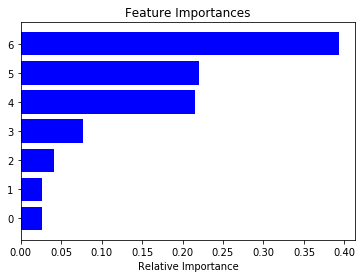

In [22]:
plt.figure(1)
plt.title('Feature Importances')
plt.barh(range(len(indices)), treefeatures[indices], color='b', align='center')
plt.xlabel('Relative Importance')

In [23]:
feature_names=[ 'dayofweek', 'dayofyear', 'hour', 'month', 'week','latitude', 'longitude']

# Tree visualation

In [24]:
#  To run this tree visulation:
#   conda install pydot-ng 
#   conda install graphviz
#   execute graphviz-2.38.msi from https://graphviz.gitlab.io/_pages/Download/Download_windows.html 
from IPython.display import Image  
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
import pydot 
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'
dot_data = StringIO()  
export_graphviz(dtree, out_file=dot_data,feature_names=feature_names,filled=True)

graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph[0].create_png())

C:\Users\skao2\Anaconda3\envs\PythonData\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


## Creating & Training Random Tree Model

In [25]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [26]:
y_pred=rfc.predict(X_test)

In [27]:
rfc.score(X_test,y_test)

0.5748792270531401

In [28]:
rfc.score(X_train,y_train)

1.0

In [29]:
om=rfc.feature_importances_
indices = numpy.argsort(om)

In [30]:
om

array([0.03370551, 0.0169419 , 0.36346178, 0.03407653, 0.02432229,
       0.26766299, 0.25982899])

In [31]:
features = df.columns

Text(0.5, 0, 'Relative Importance')

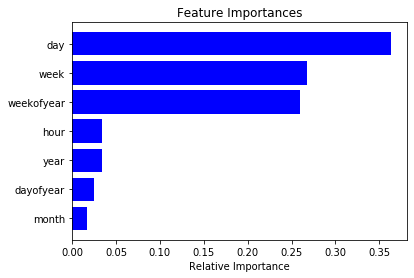

In [32]:
plt.figure(1)
plt.title('Feature Importances')
plt.barh(range(len(indices)), om[indices], color='b', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')